## Deep learning in accounting

### Introduction

Although the name Deep Learning sounds like some kind of “deeper” understanding, it basically refers to the number of layers in a neural network, the insight behind them is much more profound. The key idea of deep learning is to learn successive layers of increasingly meaningful representations. Modern deep learning models can have tens or even hundreds of successive layers of representations—all learned automatically from exposure to training data. Traditional machine learning models are sometimes called shallow models, because they tend to focus on learning only one or two layers of representations of the data.

In popular writing, deep learning is often compared to how brains work. However, this “just like our mind” is an unnecessary complication. Deep learning is just an efficient mathematical framework to learn sequences of representations from data.

### Neural network architectures

#### Traditional feed-forward neural networks

The name of this architecture comes from the way information flows through the network from input **x** to the output **y**. At every neuron, information flows towards output without any feedback connections.

If we add feedback connections to feed-forward networks, they are called recurrent neural networks. 

Usually, feed-forward networks are considered to consist of a sequency of dense layers that take vectors as inputs. However, sometimes the type is considered more general and, for example, convolutional neural networks are considered to be a special type of feed-forwarnd neural network.

Just by adding together neurons that calculate linear combinations of vectors does not give us more explanatory power when compared to traditional methods like linear regression. The key element is the activation function of neurons, which enables the networks to estimate nonlinear structures.

As can be observed from the figure below, neural network needs a lot of data as the number of parameters grows exponentially with the complexity of the network. Why? Because we need to have more data than parameters or the model will overfit severely.

![two_ann](./images/Two_layer_ann.svg)

#### Convolutional neural networks
In the computer vision context, the input for convolutional neural networks (CNN) is a multi-channeled image (instead of a vector that is commonly used in standard feed-forward neural networks), i.e. a 3D-tensor (several channels of 2D images).

The network consists of convolution layers and pooling layers.

![image.png](./images/conv_structure_1.png)

The convolution layers filter feature maps (channels in the original image) with small filters that are slid through the maps.
* Convolution  = filtering --> A dot product between the filter and a portion of the image (plus bias).
* The filter is slid through an image (every channel of the image).
* As a result, we get a slightly smaller "image" of dot products.
* The convolution layer is the main building block of CNNs

The fundamental difference between a densely connected layer and a convolution layer is that dense layers learn global structures in their input feature maps (channels), whereas convolution layers learn local patterns. This is useful in computer vision problems because, in the case of images, these local patterns can be located anywhere in the image. A traditional feed-forward network would have to learn a certain pattern anew for every location in an image. This makes CNNs data-efficient; they need fewer training samples to learn representations that have generalisation power. Moreover, CNNs have usually chains of convolutional layers, which causes these learned patterns to become more "complex" the deeper we are in the CNN. The first convolutional layers learn arcs, lines etc. and later layers connect these to circles and other more complex structures (, of course depending on the computer vision task at hand). A first convolutional layer learns small and simple patterns, a second convolutional layer learns patterns that are constructed from the patterns of the first layer, and so on.

#### ReLUs
CNNs usually use rectified linear units (ReLU) as activation functions to add nonlinearity, just like traditional densely connected neural networks. Without a non-linear activation function, the network would be linear (no matter how many layers, a linear combination of linear combinations is still a linear combination).

![image.png](./images/relu.svg)

#### Pooling layers
* Its function is to progressively reduce the spatial size of the representation to reduce the number of parameters and computation in the network. Pooling layer operates on each feature map independently.
* The most common approach used in pooling is max pooling.

![image.png](./images/Max_pooling.png)

#### Feature maps
As I mentioned, convolutional layers operate over 3D tensors, called feature maps, with two spatial axes (2D image) as well as a depth axis (also called the channels axis). For a usual RGB image, the dimension of the depth axis is  3 (red, green and blue). For a black-and-white picture, there is no depth axis, but one feature map representing different levels of grey (or the third dimension has unit length). The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map. This output feature map is still a 3D tensor: it has a width and a height that depend on the convolutional filter used. The depth is a parameter of the model, which increases when moving from left to right in a CNN. However, this does not increase the number of parameters in a model, because CNNs usually use pooling layers to decrease the size of feature maps. The channels no longer stand for specific colours as in an RGB input; rather, they stand for filters. Filters encode specific aspects of the input data: at a high level, a single filter could encode the concept "presence of a face in the input" for instance.

![image.png](./images/feature_maps.png)

#### Best pretrained models
It is often beneficial to use pre-trained networks in practical computer vision applications. Pretrained networks have their parameters trained with very large datasets using HPC capabilities. A very common dataset is Imagenet that has over 14 million images ([www.image-net.org](https://www.image-net.org)). Below are some popular pre-trained networks that have proven to be very efficient, according to the ImageNet Large Scale Visual Recognition Challenge -winners.

**ImageNet Large Scale Visual Recognition Challenge -winners**

Previous winners, with shallow neural networks, achieved around 25 % error rate. The examples below are all deep convolutional neural networks.

* 2012 - Alexnet - 8 layers - 16 % error rate - a much deeper structure and utilised GPUs during training
* 2013 - ZF-net - 8 layers - 12 % error rate
* 2014 - VGG - 19 layers - 7.3 % error rate
* 2014 - GoogleNet - 22 layers - 6.7 % error rate

Human error rate around 5 %

* 2015 - ResNet - 152 layers - 3.6 % error rate - innovation: a residual learning framework that improves the training of very deep networks
* 2016 - Ensemble of previous models - 3.0 % error rate
* 2017 - SENet - 2.25 % error rate

#### Recurrent neural networks

Recurrent neural networks excel at analysing sequences, lime time series and language. The basic architecture is like feed-forward neural network, but added with feedback connections back to the sending neuron.

![rnn](./images/rnn.svg)

The original recurrent neural network architecture achieved acceptable results with sequences. However, its performance decreases quickly when the sequence becomes longer. To overcome this problem, long short-term memory networks were invented. They try keep the training of a netwrok efficient with longer sequences. Until the invention of transformes architecture, LSTM networks were the state-of-the-art for tasks like natural language processing.
![lstm](./images/lstm.svg)

As you can see from the figure, the exact theory of LSTM networks is difficult and we skip it at this point.


#### Tensorflow

Tensorflow is a very popular and extensive deep learning library. It is also somewhat difficult to learn. For our purposes, it is enouqh that we learn the basics of the Keras module included in Tensorflow.

With Keras, it is extremely easy to build machine learning models. It is like building with Lego bricks. You just add the layers of your network, define the details of each layer, select the error function and the output function, and that's it.

If you want to replicate the Tensorflow code of this book, I strongly suggest that you **install Tensorflow within Anaconda environment**. At least, if you want to use gpu with Tensorflow. To enable the Nvidia-GPU support, you need to install also the CUDA-libraries provided by Nvidia. However, it is insanely difficult to get everything working in the GPU drivers-CUDA-Tensorflow -axis. Anaconda does everything automatically for you.

In [1]:
import tensorflow as tf

With the following commands, you can check what kind of computing units are available. Of course, you are looking for GPU-units to speed up computations. I am using the CPU version of Tensorflow so that it is easier for others to replicate the results

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7503718123590028718
]


One way to define a neural network with Keras is a single **Sequential**-command that has the layers in a list as a parameter. The densely connected layer has **ReLU** as an activation function. Because we want to categorise ten digits, **softmax** is the correct activation function for the last layer. Notice how the last layer has ten outputs, one for each digit. The **Flatten()**-layer transforms the 28 x 28 -image to a vector of size 784.

With Keras, we can also build the network using sequential **add()**-commands. We first define the **Sequential()**-type and then add the layers with the **add()** -function.

It is much easier to understand how Keras works by following an example. So, lets work through a detailed example using Keras.

### The MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used as the first test for computer vision models. These are 28x28 pixel images that are anti-aliased from the original NIST black and white images, and thus, grayscale images with 256 levels. The database contains 60,000 training images and 10,000 testing images.

![MNIST](./images/mnist.png)

**Keras.dataset** has the MNIST dataset, so we avoid the hassle of downloading and preprocessing the dataset by ourselves.

In [5]:
mnist = tf.keras.datasets.mnist

With **load_data()**, we can load the train and test datasets as **Numpy arrays**.

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
type(x_train)

numpy.ndarray

We have 60000 images in the training set and 10000 images in the test set.

In [8]:
len(x_train), len(x_test)

(60000, 10000)

Let's check what kind of data we have. Matplotlib has a function to plot images. First, we load the library. With **plt.imshow()**, we can plot the image. We need to set **cmap=gray** to get the correct grayscale image.

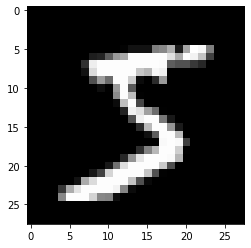

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='gray')

In [10]:
y_train[0]

5

The originals are greyscale images with each pixel having a value from 0 to 255. We normalize them to values between 0 and 1 (neural networks like small values).

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Densely connected network
First, we fit a traditional densely connected feed-forward neural network to the data.

![image.png](./images/feed_forward.png)!

Our data is a 3D-tensor of the form 60000 images x 28 pixels x 28 pixels. Sometimes we need to make the transform (60000,28,28) --> (60000,28,28,1) and sometimes not. If you get an error in the model.fit -step, run the code below.

In [12]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

Currently, our labels are integers from 0 to 9. We need to transorm them to binary classes. For example 1-->(0,1,0,0,0,0,0,0,0,0) and 9-->(0,0,0,0,0,0,0,0,0,1). This can be done with the **to_categorical()** -function in Keras.utils.

In [13]:
train_labels = tf.keras.utils.to_categorical(y_train)

In [14]:
test_labels = tf.keras.utils.to_categorical(y_test)

One way to define a neural network with Keras is a single **Sequential**-command that has the layers in a list as a parameter. The densely connected layer has **ReLU** as an activation function. Because we want to categorise ten digits, **softmax** is the correct activation function for the last layer. Notice how the last layer has ten outputs, one for each digit. The **Flatten()**-layer transforms the 28 x 28 -image to a vector of size 784.

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

You can check your model with the **summary()** -function. The model has 203 530 parameters.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


With **compile()**, we build our neural network to be ready for use. For classification problems, **categorical_crossentropy** is the correct loss function. We measure our performance with accuracy. It is just the percentage of correct classifications.

In [18]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

Next, we feed the training data to our model and train it using back-propagation. Everything is automatic, so, we do not need to worry about the details. The training data accuracy rises to 0.986 = 98.6%. However, true performance needs to be evaluated using test data. We can save to **history** information about the training process. The model is trained with batches of 64 images. So, to go through all the images, we need 938 rounds (the last batch has 32 images). One epoch is one round of going through all the data.

In [19]:
history = model.fit(x_train,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 1s 566us/step - loss: 0.4124 - accuracy: 0.8834
Epoch 2/5
938/938 [==============================] - 1s 564us/step - loss: 0.1165 - accuracy: 0.9660
Epoch 3/5
938/938 [==============================] - 1s 561us/step - loss: 0.0749 - accuracy: 0.9775
Epoch 4/5
938/938 [==============================] - 1s 561us/step - loss: 0.0569 - accuracy: 0.9828
Epoch 5/5
938/938 [==============================] - 1s 564us/step - loss: 0.0440 - accuracy: 0.9871


The following code plots the progress of training. Within the code is info for different commands.

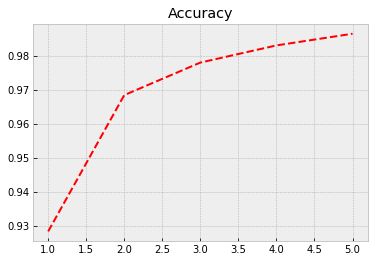

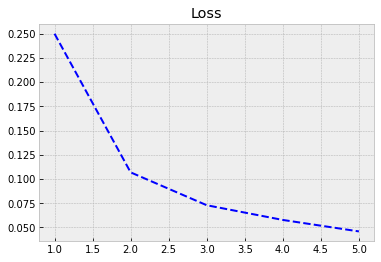

In [20]:
plt.style.use('bmh') # We select as a plot-style 'bmh' that is in my opinion usually the prettiest.
acc = history.history['accuracy'] # The evolution of accuracy to a list.
loss = history.history['loss'] # The evolution of loss to a list.
epochs = range(1, len(acc) + 1) # Correct x-axis values (epochs)
plt.plot(epochs, acc, 'r--') # Plot epochs vs. accuracy
plt.title('Accuracy') # Add title
plt.figure() # Show the first figure. Without this command, accuracy and loss would be drawn to the same plot.
plt.plot(epochs, loss, 'b--') # Plot epochs vs. loss
plt.title('Loss') # Add title
plt.show() # Show everyhting

**Evaluate()** can be used to evaluate the model with the test data. Acccuracy with the test data is 0.974

In [21]:
test_loss,test_acc = model.evaluate(x_test,test_labels)

313/313 [==============================] - 0s 307us/step - loss: 0.0739 - accuracy: 0.9783


In [22]:
test_acc

0.9782999753952026

### Convolutional neural network

Identifying the digits correctly is a computer vision problem. So, we should expect that convolutional neural networks would perform better. Thus, we build a simple CNN to identify the digits.

![image.png](./images/cnn_example.gif)

With Keras, we can also build the network using sequential **add()**-commands. We first define the **Sequential()**-type and then add the layers with the **add()* -function.

In [23]:
model_cnn = tf.keras.models.Sequential()

A convolutional layer with 32 feature maps and a 3x3 -filter: The activation is again **ReLU**. For the first layer, we need to define the format of the input data, in this case, 28 x 28 -pixel images.

In [24]:
model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))

A max-pooling layer to decrease the size of the feature maps. The maximum values are selected from a 2 x 2 window.

In [25]:
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

Again, a convolutional layer. Notice how the number of feature maps increases. This is typical for CNN architectures.

In [26]:
model_cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

A second max-pooling layer.

In [27]:
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

A third convolutional layer.

In [28]:
model_cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

**Flatten()** -layer transforms the 2D feature maps to a 1D vector so that we can feed it to an ordinary densely-connected layer.

In [29]:
model_cnn.add(tf.keras.layers.Flatten())

One densely-connected layer before the output-layer.

In [30]:
model_cnn.add(tf.keras.layers.Dense(64,activation = 'relu'))

The output-layer has ten neurons that give probabilities for each digit. **Softmax** is the correct activation function for categorical predictions.

In [31]:
model_cnn.add(tf.keras.layers.Dense(10,activation = 'softmax'))

The **summary()** -function shows that our model has 93 322 parameters. Thus, much less than the previous densely-connected traditional neural network.

In [32]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

Again, we compile our model...

In [33]:
model_cnn.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

...and train it.

Although our model has much fewer parameters, the performance with the training data is much better. Now, the accuracy is 0.994. Let's see how it performs with the test data...

In [34]:
history = model_cnn.fit(x_train,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.3877 - accuracy: 0.8747
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0475 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0332 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0219 - accuracy: 0.9936
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0192 - accuracy: 0.9943


Again we plot the progress from **history**.

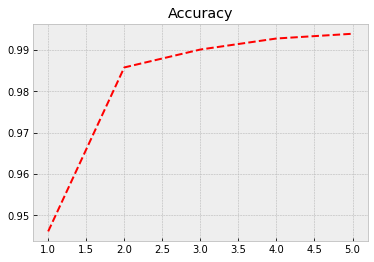

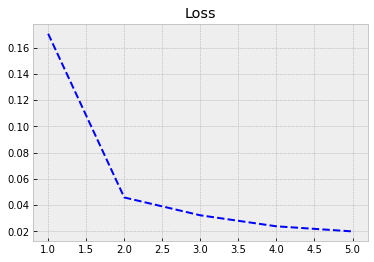

In [35]:
plt.style.use('bmh') # We select as a plot-style 'bmh' that is in my opinion usually the best.
acc = history.history['accuracy'] # The evolution of accuracy to a list.
loss = history.history['loss'] # The evolution of loss to a list.
epochs = range(1, len(acc) + 1) # Correct x-axis values (epochs)
plt.plot(epochs, acc, 'r--') # Plot epochs vs. accuracy
plt.title('Accuracy') # Add title
plt.figure() # Show the first figure. Without this command, accuracy and loss would be drawn to the same plot.
plt.plot(epochs, loss, 'b--') # Plot epochs vs. loss
plt.title('Loss') # Add title
plt.show() # Show everyhting

With **evaluate()**, we can check the performance with the test data. We achieve much better accuracy of 0.989 with much fewer parameters.

In [36]:
test_loss,test_acc = model_cnn.evaluate(x_test,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0393 - accuracy: 0.9880


In [37]:
test_acc

0.9879999756813049